# O presente trabalho faz parte da avaliação da disciplina Aprendizado de Máquina, constante da ementa do curso de mestrado em ciência da computação, oferecida pelo CEFET-Rj.
Professor: Eduardo Bezerra

Aluna: Francimary Garcia

Entrega: 02/10/2017

# Exercício 1 - Regressão Linear com uma Variável

Implementar regressão linear para predizer o lucro para uma cadeia de food trucks. 
Essa cadeia já possui diversas ﬁliais em diferentes cidades. São fornecidos : População e Lucro para cada uma das cidades. 

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import csv
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
import os  
%matplotlib inline


Lendo arquivo fornecido com os valores de tamanho da população e lucro relacionado: ex1data1.txt

In [140]:
arquivo = 'C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\ex1data1.txt'

ficheiro = open(arquivo, "r")

dados = pd.read_csv(ficheiro, names = ['Pop', 'Lucro'])

dados.head()

,Pop,Lucro
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# 1.1 - Plotando gráfico de dispersão para análise das informações fornecidas.

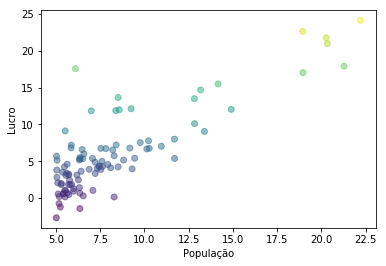

In [141]:
scatter_plot = plt.scatter(dados['Pop'], dados['Lucro'], alpha=0.5, 
                           c=dados['Lucro'])

plt.xlabel('População')
plt.ylabel('Lucro')
plt.show()


Podemos observar através do gráfico de dispersão acima, que existe um agrupamento relevante de food trucks em cidades com população pequena, além disso, observamos uma tendência de aumento dos lucros em cenários com populações maiores.


A função computarCusto é implementada utilizando a fórmula: 1/2m ∑(i=1)^m(hθ(x^((i))  )-y^((i)) )^2.

Esta função demonstra a qualidado do modelo utilizado através do erro ocorrido nas predições realizadas. 
O erro é calculado entre as predições realizadas pelo modelo e os pontos de dados conhecidos. 
O somatório de todos os erros parcias representa o erro total do modelo de predição.

In [142]:
def computarCusto(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))
    

A coluna de treinamento (População) é setada para a variável X, enquanto que a coluna target (lucro) é setada para a variável y.

X e y são transformadas em matrizes e a variável theta é inicializada com um vetor de zeros.

In [143]:
dados.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = dados.shape[1]
X = dados.iloc[:,0:cols-1]
y = dados.iloc[:,cols-1:cols]

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))


Testando o funcionamento da função computarCusto, usando o valor de theta ainda zerado.

In [144]:

print("O erro para o modelo com theta igual a zero é: %.4f" %computarCusto(X, y, theta))


O erro para o modelo com theta igual a zero é: 32.0727


Implementação da técnica de otimização chamada Gradiente Descendente, para encontrar o parâmetro Theta.

Para cada iteração, será calculado o gradiente do erro para que seja identificada a direção apropriada para a movimentação do vetor, reduzindo desta forma o erro e fazendo a solução mais próxima da solução ótima.


In [173]:
def gradienteDescente(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computarCusto(X, y, theta)
        
    return theta, cost



Inicializando taxa de aprendizado alpha e número de iterações.

In [146]:
alpha = 0.01
iters = 1500

In [147]:
[theta, a] = gradienteDescente(X, y, theta, alpha, iters)
print("Abaixo os valores de Theta e Custo que representam o modelo linear ótimo para o conjunto de dados em análise:")
theta

Abaixo os valores de Theta e Custo que representam o modelo linear ótimo para o conjunto de dados em análise:


matrix([[-3.63029144,  1.16636235]])

O custo com os parâmetros ótimos encontrados pelo gradiente descendente é calculado.

In [148]:
print("O erro para o modelo com o valor de theta fornecido pelo gradiente é: %.4f" %computarCusto(X, y, theta))

O erro para o modelo com o valor de theta fornecido pelo gradiente é: 4.4834


Podemos verificar acima que houve uma melhora significante no valor do erro do modelo usado, após a aplicação dos parâmetros ótimos, passando de 32.0727 para 4.4770.



# 1.2 - Com o objetivo de avaliarmos se as predições realizadas pelo modelo de regressão linear estão conformes com os dados conhecidos, vamos plotar a linha de regressão.
Além disso, serão calculados os lucros para populaçoes de 35 e 70 mil habitantes.

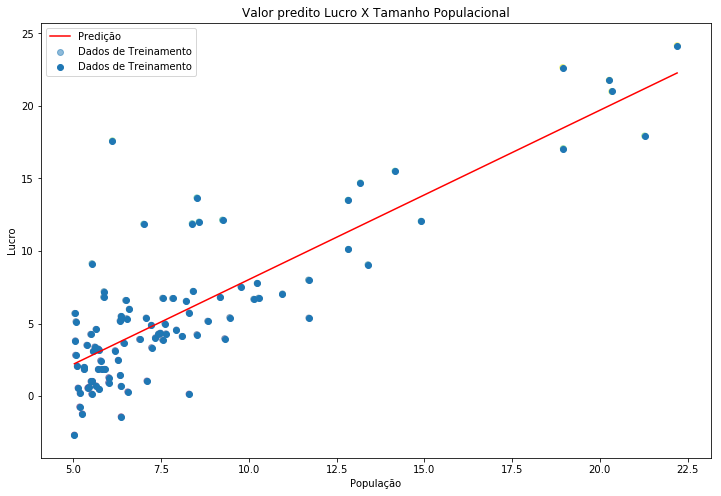

In [149]:
x = np.linspace(dados.Pop.min(), dados.Pop.max(), 100)
f = theta[0, 0] + (theta[0, 1] * x)


fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Predição')

scatter_plot = plt.scatter(dados['Pop'], dados['Lucro'], alpha=0.5, 
                          c=dados['Lucro'],label='Dados de Treinamento' )
ax.scatter(dados.Pop, dados.Lucro, label='Dados de Treinamento')
ax.legend(loc=2)
ax.set_xlabel('População')
ax.set_ylabel('Lucro')
ax.set_title('Valor predito Lucro X Tamanho Populacional')

Como mostrado acima a linha de predição encontrada pelo gradiente obteve uma adaptação bem próxima à tendência dos dados conhecidos. 

Com os parâmetros obtidos para o modelo ótimo, devemos agora predizer qual o lucro da cadeia de food trucks em cidades com 35 e 70 mil habitantes.

In [150]:
predict1 = np.dot(np.array([1, 3.5]), np.squeeze(np.asarray(theta))*10000)
print("Para população de 35,000 habitantes, predizemos um lucro de: $ %.2f" %predict1)
predict2 = np.dot(np.array([1, 7]), np.squeeze(np.asarray(theta))*10000)
print ("Para população de 70,000 habitantes, predizemos um lucro de $ %.2f" %predict2)

Para população de 35,000 habitantes, predizemos um lucro de: $ 4519.77
Para população de 70,000 habitantes, predizemos um lucro de $ 45342.45


# 1.3 - Podemos mostrar a tendência de redução do custo a cada iteração, plotando o gráfico abaixo:

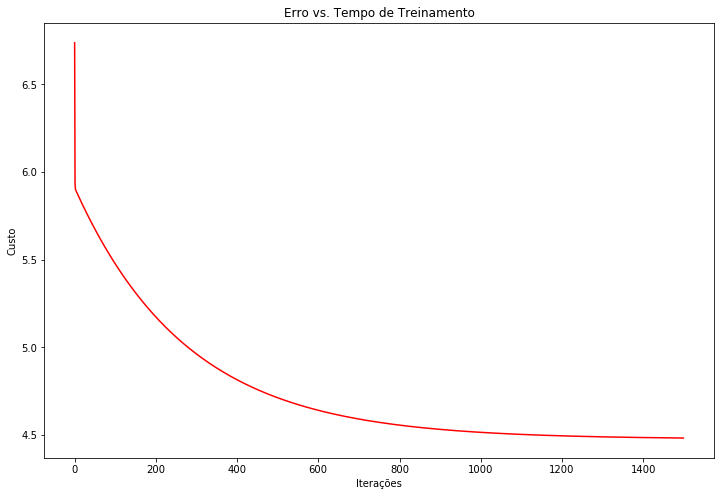

In [151]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(np.arange(iters), a, 'r')
ax.set_xlabel('Iterações')
ax.set_ylabel('Custo')
ax.set_title('Erro vs. Tempo de Treinamento')

Como visto acima, o custo sempre decresce, representando a eficiência do modelo de otimização.

 Plotar o custo sobre uma grade bidimensional de valores de θ0 e de θ1. Para isso, utilizando a função computarCusto.


Abaixo os gráficos de superfície e contorno para o custo, utilizando os valores de theta0 e theta1.

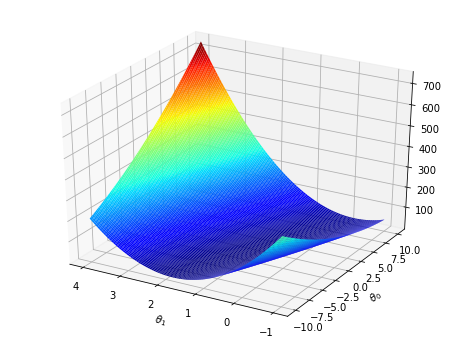

In [181]:

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta_ = np.array([theta0, theta1])
        J_vals[j,i]= computarCusto(X,y,np.matrix(theta_))
       
# Surface cost function
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
x_vals, y_vals = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(y_vals, x_vals, J_vals, rstride=1, cstride=1, linewidth=0, cmap=cm.jet);
# invert x axis to get the same 3D representation as in Octave
ax.invert_xaxis()
plt.xlabel(r'$\theta_{1}$')
plt.ylabel(r'$\theta_{0}$');

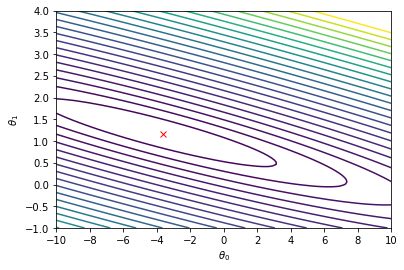

In [182]:
# Contour cost function, showing minimum
levels = [i*i for i in np.arange(25)]
contour = plt.contour(theta0_vals, theta1_vals, J_vals, levels)
plt.plot( np.squeeze(np.asarray(theta))[0], np.squeeze(np.asarray(theta))[1], 'rx')
plt.xlabel(r'$\theta_{0}$')
plt.ylabel(r'$\theta_{1}$')
plt.xticks(np.arange(-10,11,2))
plt.yticks(np.arange(-1,4.5,0.5));

# Exercício 2 - Regressão Linear com Múltiplas Variáveis

Neste exercício foi fornecido um arquivo de entrada, com informações sobre valores de venda de imóveis: Área da propriedade(pés quadrados), número de quartos e preço do imóvel. O objetivo neste momento é realizar a normalização dos valores fornecidos e implementar as funções de Computar Custo e Gradiente Descendente para o cenário de múltiplas variáveis.


Inicialização da taxa de aprendizado alpha e número de iterações.

In [183]:
alpha = 0.01
iters = 1500

Leitura do arquivo de dados fornecido.

In [184]:
arquivo = 'C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\ex1data2.txt'

ficheiro = open(arquivo, "r")

dados2 = pd.read_csv(ficheiro, names = ['Área', 'Dormitórios', 'Preço'])
dados2.head()

,Área,Dormitórios,Preço
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# 2.1 - Implementação da normalização dos dados

Implementação da normalização dos dados, necessária devido à característica extremamente diversa das grandezas dos valores fornecidos, onde a grandeza do atributo área representaria (se não normalizado) um peso consideravelmente maior na regressão linear executada, que o atributo de número de dormitórios.

In [185]:
dados2 = (dados2 - dados2.mean()) / dados2.std()
dados2.head()

,Área,Dormitórios,Preço
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Aqui as colunas para os dados de treinamento são armazenadas na variável X2 e os valores target inseridos na variável y2. As duas variáveis são transformadas em matrizes e a variável theta2 inicializada com um vetor de zeros.

In [186]:
# add ones column
dados2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = dados2.shape[1]
X2 = dados2.iloc[:,0:cols-1]
y2 = dados2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

As funções gradienteDescente e computarCusto são executadas e o valor do erro encontrado.

In [187]:
# perform linear regression on the data set
theta, custo2 = gradienteDescente(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
print("O valor do custo do erro do modelo implementado é: %.4f" %computarCusto(X2, y2, theta))

O valor do custo do erro do modelo implementado é: 0.1307


Abaixo o gráfico do treinamento mostra que o valor do custo do erro do modelo decresce com as sucessivas iterações.

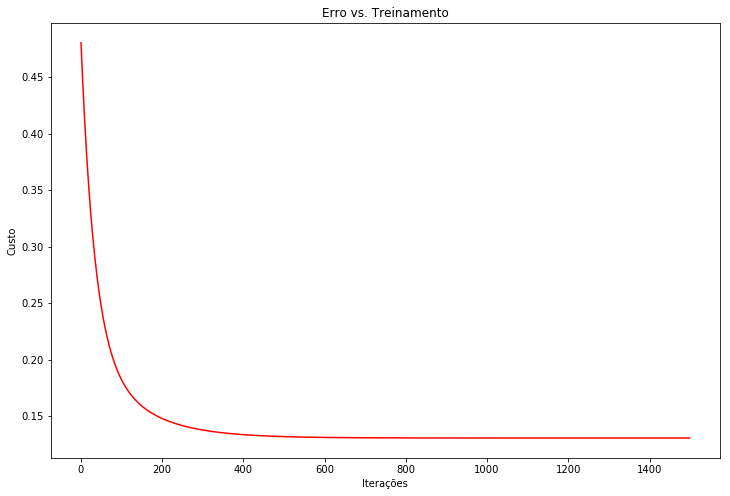

In [188]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), custo2, 'r')
ax.set_xlabel('Iterações')
ax.set_ylabel('Custo')
ax.set_title('Erro vs. Treinamento')

# 2.2 - Gradiente Descendente

As duas funções computarCusto e gradienteDescente, se mantiveram exatamente iguais as funções utilizadas na parte 1 deste exercício. 

Isto aconteceu devido à característica vetorizada na passagem dos parâmetros de entrada, onde a variável X(atributos independentes) sempre será carregada com as n-1 colunas do arquivo de entrada e a variável y (atributo target) com a última coluna do arquivo, com isto a implementação poderá ser utilizada para qualquer número de colunas que seja desejado.

# Exercício 3-  Regressão Logística


Implementar a regressão logística. Em particular, criar um classiﬁcador para predizer se um estudante será admitido em uma universidade, com base nos resultados de duas avaliações. Suponha que estão disponíveis dados históricos acerca de realizações passadas dessas avaliações, e que esses dados históricos podem ser usados como conjunto de treinamento. 
Para cada exemplo desse conjunto de treinamento, temos as notas das duas avaliações e a decisão acerca do candidato (aprovado ou reprovado). 

# 3.1 Visualização dos dados


O conjunto de dados fornecido é composto por duas variáveis independentes Nota1 e Nota2 e uma variável binária que classifica o candidato em Aprovado(1) ou Reprovado(0).

In [189]:
arquivo = 'C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\ex2data1.txt'

ficheiro = open(arquivo, "r")

dados3 = pd.read_csv(ficheiro, names = ['Nota1', 'Nota2', 'Admissao'])
dados3.head()

,Nota1,Nota2,Admissao
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Plotando o gráfico de dispersão para visualizarmos a tendência dos dados conhecidos.

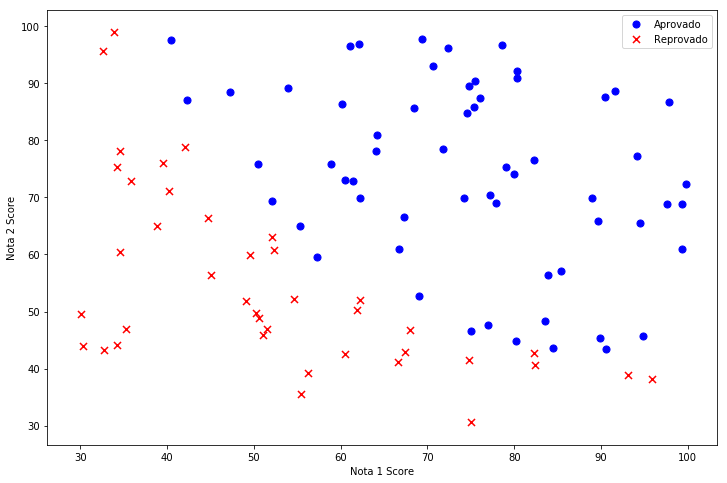

In [190]:
positive = dados3[dados3['Admissao'].isin([1])]  
negative = dados3[dados3['Admissao'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Nota1'], positive['Nota2'], s=50, c='b', marker='o', label='Aprovado')  
ax.scatter(negative['Nota1'], negative['Nota2'], s=50, c='r', marker='x', label='Reprovado')  
ax.legend()  
ax.set_xlabel('Nota 1 Score')  
ax.set_ylabel('Nota 2 Score')  

Pelo gráfico de dispersão mostrado acima, podemos observar uma fronteira bastante distinta entre as duas classes de informações.

# 3.2.1 Função Sigmoide

In [191]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

Esta função é a função "ativação" para o resultado da regressão logística. Converte uma entrada contínua em um valor entre zero e um. Esse valor pode ser interpretado como a probabilidade da classe ou a probabilidade de que o exemplo de entrada seja classificado positivamente. Usando essa probabilidade juntamente com um valor limiar, podemos obter uma predição discreta de rótulos. Isso ajuda a visualizar a saída da função para ver o que realmente está fazendo.

Testando a função sigmoid com 0, valores altos e valores baixos.

In [192]:
sigmoid(0)

0.5

In [193]:
sigmoid(10000)

1.0

In [198]:
sigmoid(-500)

7.1245764067412845e-218

# 3.2.2 Função de custo e gradiente


In [199]:
def cost(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [200]:
# add a ones column - this makes the matrix multiplication work out easier
dados3.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = dados3.shape[1]  
X = dados3.iloc[:,0:cols-1]  
y = dados3.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(3)  

In [209]:
print("O valor do custo do modelo implementado, com o theta zerado é: %.4f" %cost(theta, X, y))
 

O valor do custo do modelo implementado, com o theta zerado é: 0.6931


In [210]:
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

# 3.2.3- Aprendizado dos Parâmetros

In [211]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  

print("O valor do custo do modelo implementado para os parâmetros ótimos é: %.4f" %cost(result[0], X, y) )

O valor do custo do modelo implementado para os parâmetros ótimos é: 0.2035


# 3.2.4 Avaliação do modelo

Usar o modelo correspondente para predizer se um candidato qualquer será aprovado. 
Para um candidato com notas 45 e 85 na primeira e segunda avaliações, respectivamente.

In [234]:
def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])  

predictions = predict(theta_min, X)  

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print("Precisão = {0}%".format(accuracy))



Precisão = 89%


A implementação do classificador usando o modelo de regressão logística acima, classifica corretamente se um candidato foi aprovado ou reprovado no processo, 89% das vezes.

In [246]:
# Predict values for a student with an Exam 1 score of 45 and an Exam 2 score of 85

#X0 = np.array([1, (45 - mu.Nota1)/sigmoid('Nota1')], (85 - mu.Nota2)/sigmoid['Nota2']])

X0 = np.matrix([1, 45, 85])
theta_min = np.matrix(result[0])  
print(X0)
print(theta_min)
prediction = predict(theta_min, X0)
print(prediction)
#print('For a student with scores 45 and 85, we predict an admission probability of %f' % prediction)


# number of positive predictions where Y==1
accuracy = np.sum((np.dot(theta_min, X0)>0)==y)/y.size
print('\nTrain Accuracy: %f' % accuracy)



[[ 1 45 85]]
[[-25.1613186    0.20623159   0.20147149]]
[1]


ValueError: shapes (1,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [243]:
X0 = np.matrix([1, 45, 85])
print(X0)

             
theta_min = np.matrix(result[0]) 
print(theta_min)

predictions = predict(theta_min, X0)  
print(predictions)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
print(correct)
accuracy = (sum(map(int, correct)) % len(correct))  
print("Precisão = {0}%".format(accuracy))


[[ 1 45 85]]
[[-25.1613186    0.20623159   0.20147149]]
[1]
[0]
Precisão = 0%
